<a href="https://colab.research.google.com/github/edaislam/ML-Assignment1/blob/main/CNG409_PA1_2585081.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Exploratory Data Analysis**


------ SUMMARY STATISTICS ------
                           mean        std      min        max
fixed acidity          8.319637   1.741096  4.60000   15.90000
volatile acidity       0.527821   0.179060  0.12000    1.58000
citric acid            0.270976   0.194801  0.00000    1.00000
residual sugar         2.538806   1.409928  0.90000   15.50000
chlorides              0.087467   0.047065  0.01200    0.61100
free sulfur dioxide   15.874922  10.460157  1.00000   72.00000
total sulfur dioxide  46.467792  32.895324  6.00000  289.00000
density                0.996747   0.001887  0.99007    1.00369
pH                     3.311113   0.154386  2.74000    4.01000
sulphates              0.658149   0.169507  0.33000    2.00000
alcohol               10.422983   1.065668  8.40000   14.90000
quality                5.636023   0.807569  3.00000    8.00000

------- MISSING VALUES -------
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides  

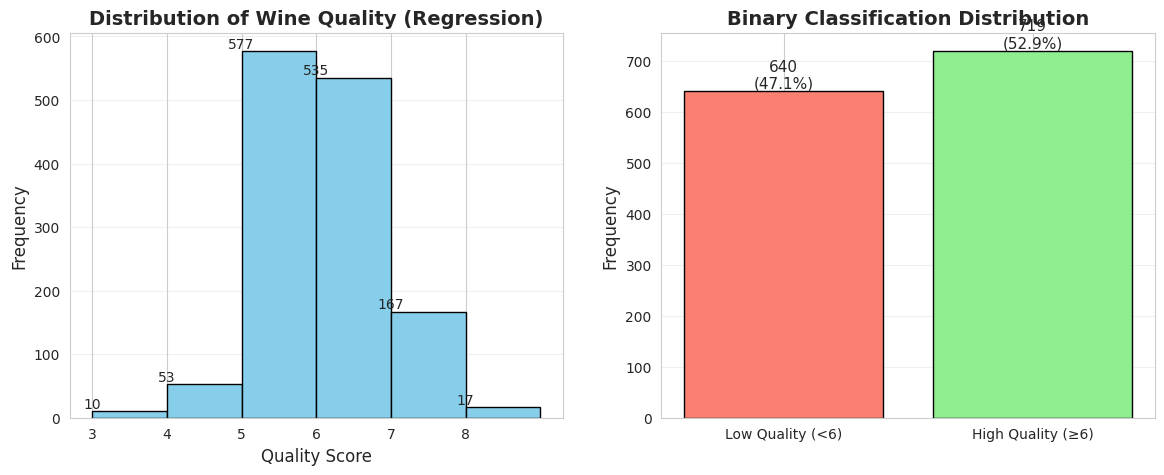

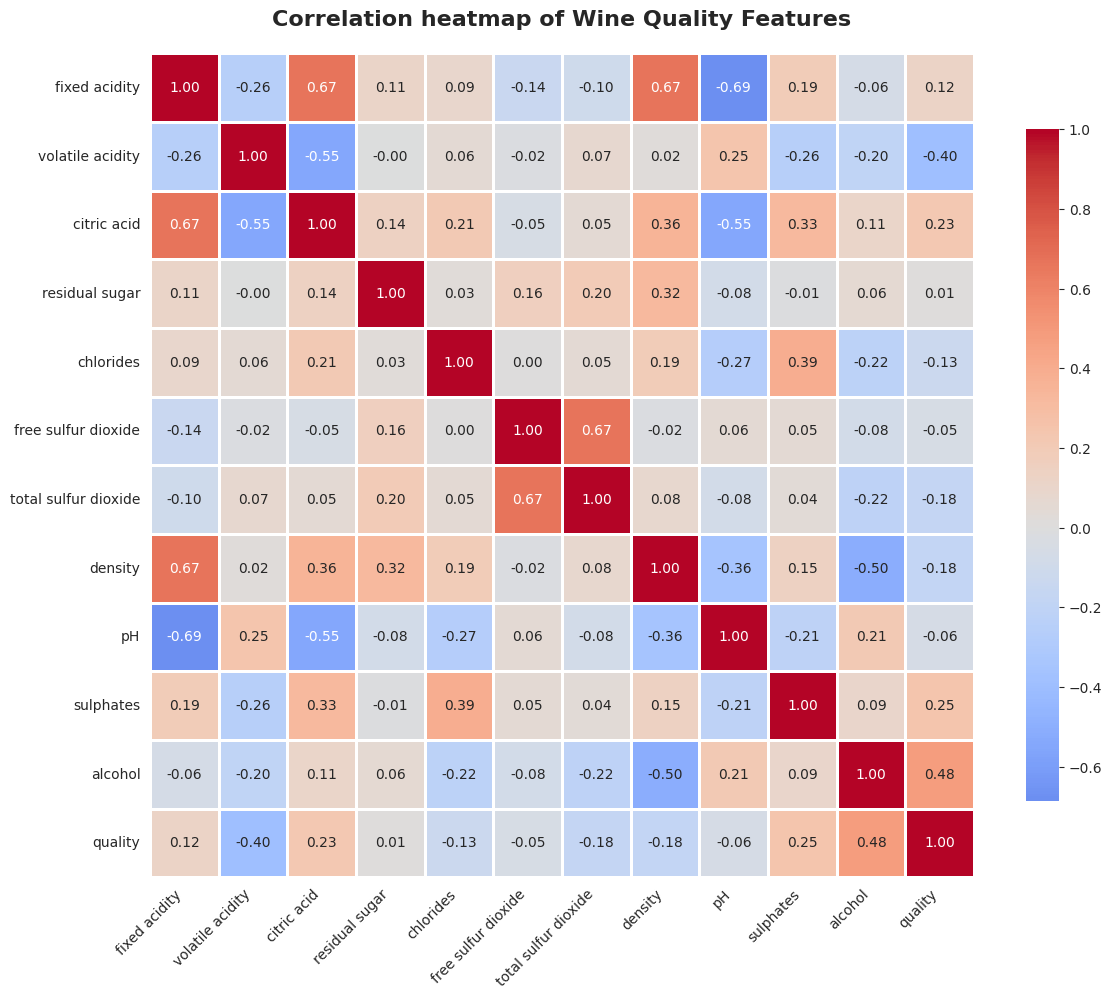


------ correlation with quality -----------

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

----- top positive correlations -------

alcohol                  : +0.480
sulphates                : +0.249
citric acid              : +0.228
fixed acidity            : +0.119
residual sugar           : +0.014

----- top negative correlations -------

free sulfur dioxide      : -0.050
pH                       : -0.055
chlorides                : -0.131
total sulfur dioxide     : -0.178
density                  : -0.184
volatile acidity         : -0.395


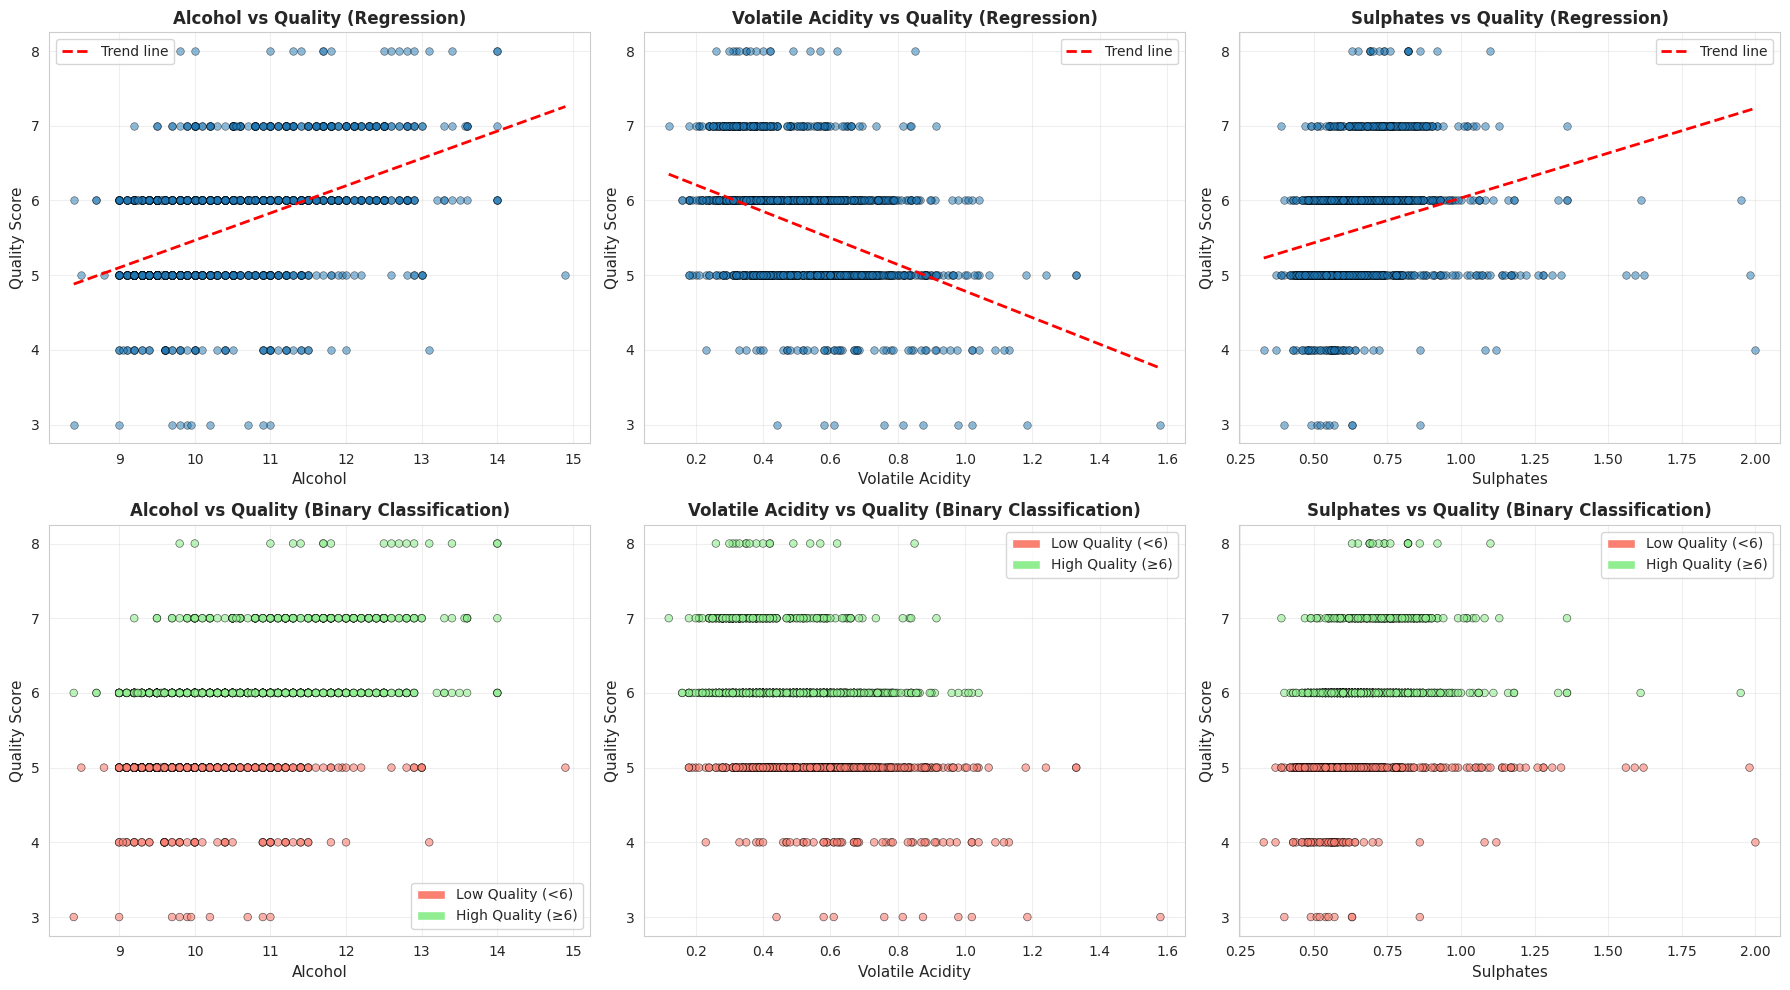

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
dataFile = pd.read_csv('winequality-red.csv',sep=';')
summary_stats = dataFile.describe().T[['mean','std', 'min', 'max']]
print("\n------ SUMMARY STATISTICS ------")
print(summary_stats)
print("\n------- MISSING VALUES -------")
missing_vals = dataFile.isnull().sum()
print(missing_vals)
print(f"\nTotal number of the Missing Values: {missing_vals.sum()}")
print("\n------ DUPLICATE VALUES ------")
duplicated_values = dataFile.duplicated().sum()
print(f"\nTotal number of duplicated values: {duplicated_values}")
if duplicated_values > 0:
  print("\nDuplicated Values: ")
  print(dataFile[dataFile.duplicated(keep=False)])
#handle the missing and duplicated values
if missing_vals.sum() > 0:
  print("\nDropping missin values...")
  dataFile = dataFile.dropna()
  print(f"\nNumber of rows after removing missing values: {len(dataFile)}")


if duplicated_values > 0:
  print("\nDropping duplicated values...")
  dataFile = dataFile.drop_duplicates(keep='first')
  print(f"\nNumber of rows after removing duplicates: {len(dataFile)}")

#handle inconsistent values
print("\n----- INCONSISTENT VALUES CHECK ---------")
#check if quality is in excpected range
print(f"Quality range: {dataFile['quality'].min()} to {dataFile['quality'].max()}")
print(f"Unique quality values: {sorted(dataFile['quality'].unique())}")
#check for negative values
for col in dataFile.columns:
  if (dataFile[col] < 0).any():
    print(f"WARNING: {col} has negative values!")
else:
  print("There isn't any inconsistent value.")

print("\nCLEANED DATA")
print(dataFile)
#---------------------------------------------------------------------------------
#task1_2 target variable analysis
sns.set_style("whitegrid")
#figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#first table: distribution of quality for regression
axes[0].hist(dataFile['quality'], bins=range(3, 10), edgecolor='black', color='skyblue')
axes[0].set_xlabel('Quality Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Wine Quality (Regression)', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(3, 9))
axes[0].grid(axis='y', alpha=0.3)
#adding the count labels
for i in range(3, 9):
    count = len(dataFile[dataFile['quality'] == i])
    if count > 0:
        axes[0].text(i, count, str(count), ha='center', va='bottom')
#second table: distrubution of quality for binary

# Calculate counts directly
low_quality_count = len(dataFile[dataFile['quality'] < 6])
high_quality_count = len(dataFile[dataFile['quality'] >= 6])

# Plot the bar chart
axes[1].bar(['Low Quality (<6)', 'High Quality (≥6)'],
            [low_quality_count, high_quality_count],
            color=['salmon', 'lightgreen'], edgecolor='black')
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Binary Classification Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, count in enumerate([low_quality_count, high_quality_count]):
    axes[1].text(i, count, f'{count}\n({count/len(dataFile)*100:.1f}%)',
                ha='center', va='bottom', fontsize=11)

#------------------------------------------------------------------------------
#correlation heatmap
correlation_matrix = dataFile.corr()

#create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink":0.8})
plt.title('Correlation heatmap of Wine Quality Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#highliht which features are most correlated with quality
corr_quality = correlation_matrix['quality'].sort_values(ascending=False)
print("\n------ correlation with quality -----------\n")
print(corr_quality)

#most ones
print("\n----- top positive correlations -------\n")
corr_positive = corr_quality[corr_quality > 0].drop('quality')
for feature, corr in corr_positive.items():
  print(f"{feature:25s}: {corr:+.3f}")
print("\n----- top negative correlations -------\n")
negative_corr = corr_quality[corr_quality < 0]
for feature, corr in negative_corr.items():
    print(f"{feature:25s}: {corr:+.3f}")

#-----------------------------------------------------------------------
#Feature–Target Relationships:
#select 3 representative features
features = ['alcohol', 'volatile acidity', 'sulphates']
#binary labels for color coding (without adding to dataframe)
binary_labels = (dataFile['quality'] >= 6).astype(int)
colors = ['salmon' if label == 0 else 'lightgreen' for label in binary_labels]
#3 colums and 2 rows
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

#row 1: scatterplot
for idx, feature in enumerate(features):
    axes[0, idx].scatter(dataFile[feature], dataFile['quality'],
                        alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
    axes[0, idx].set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[0, idx].set_ylabel('Quality Score', fontsize=11)
    axes[0, idx].set_title(f'{feature.replace("_", " ").title()} vs Quality (Regression)',
                          fontsize=12, fontweight='bold')
    axes[0, idx].grid(alpha=0.3)

    # Add trend line
    z = np.polyfit(dataFile[feature], dataFile['quality'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(dataFile[feature].min(), dataFile[feature].max(), 100)
    axes[0, idx].plot(x_trend, p(x_trend), "r--", linewidth=2, label='Trend line')
    axes[0, idx].legend()

# Row 2: Scatterplots with binary classification color coding
for idx, feature in enumerate(features):
    scatter = axes[1, idx].scatter(dataFile[feature], dataFile['quality'],
                                   c=colors, alpha=0.6, s=30,
                                   edgecolors='black', linewidth=0.5)
    axes[1, idx].set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[1, idx].set_ylabel('Quality Score', fontsize=11)
    axes[1, idx].set_title(f'{feature.replace("_", " ").title()} vs Quality (Binary Classification)',
                          fontsize=12, fontweight='bold')
    axes[1, idx].grid(alpha=0.3)

    # Add legend for colors
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='salmon', label='Low Quality (<6)'),
                      Patch(facecolor='lightgreen', label='High Quality (≥6)')]
    axes[1, idx].legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()





**Summary Statistics:** The dataset contains 1599 wine samples with 11 different features. The target variable is the quality of these wines. Table 1 ???? shows the mean, standard deviation, min and max values for all the features. There are no missing values. There are 240 duplicated rows, duplicated values are founded and removed by keeping the first occurence. Cleaned dataset contains 1359. All the values in the dataset are within the expected range and there are no negative values detected.  


---


**Target Variable Analysis:** Table 2 and 3 shows the distrubiton of the wine quality. When we question the suitability of regression by looking table 2, the quaility ranges from 3 to 8 thus we can say that there is variability. But most samples concentrated in the middle range (5-6) and this may lead to models to predict average quality more accuretly than extreme values. When we look at the table 3 which represents binary classification of the quality distribution, there 640 low quality wines and 719 high quality wines. They are almost equal thus we can say that the model is suitable for binary classification.


---


**Correlation Heatmap:** Table 4 show the correlation between all the features and the target variable (quality). Red color indicates the negative correlation and blue color represents positive correlations. Alcohol has +0.480 correlation value thus it is the strongest positive correlation. Using this we can say that wines with higher alcohol percentage are tend to have higher quality values. Volatile Acidity has a correlation value -0.395 thus it is the strongest negative correlation with quality of the wine. By that, we can say that higher volatile acidity is associated with lower quality value.
Relevance for Regression Models: Fetaures that has stronger correlations such as alcohol and volatile acidity are likely to be more important predictors in regression models.  
Relevance for tree models: Decision trees can be used with both linear and non-linear relationships. Decision trees may also identify important interactions between weakly correlated features.



---



**Feature-Target Relationships:** Table ?? represents scatterplots for three representatine features. As representative features I chosed alcohol, volatile acidity and sulphates since they have the strongest correlations. As we can see from the table, Alcohol demonstrates the best class seperation followed by volatile acidity which clearly shows negative relationship with quality. These features would appear closer to the root of decision trees. Sulphates shows weaker seperation. Suggesting it would appear deeper in the tree.

**Task 2: Regression and Classification**
2.1 Linear Regression

---




----------------NORMAL EQUATION SOLUTION-----------------


Normal Equation Results:
  Train - MSE: 0.4167, RMSE: 0.6455, R²: 0.3734
  Val   - MSE: 0.4268, RMSE: 0.6533, R²: 0.3583
  Test  - MSE: 0.5173, RMSE: 0.7192, R²: 0.3051

----------------Gradient Descent Solution-----------------


Training with learning rate α = 0.01:
  Converged at iteration 740
  Final cost: 0.4170 after 740 iterations
  Train - MSE: 0.4170, RMSE: 0.6458, R^2: 0.3729
  Val   - MSE: 0.4268, RMSE: 0.6533, R^2: 0.3583
  Test  - MSE: 0.5196, RMSE: 0.7208, R^2: 0.3020

Training with learning rate α = 0.05:
  Converged at iteration 254
  Final cost: 0.4168 after 254 iterations
  Train - MSE: 0.4168, RMSE: 0.6456, R^2: 0.3732
  Val   - MSE: 0.4258, RMSE: 0.6526, R^2: 0.3598
  Test  - MSE: 0.5189, RMSE: 0.7203, R^2: 0.3030


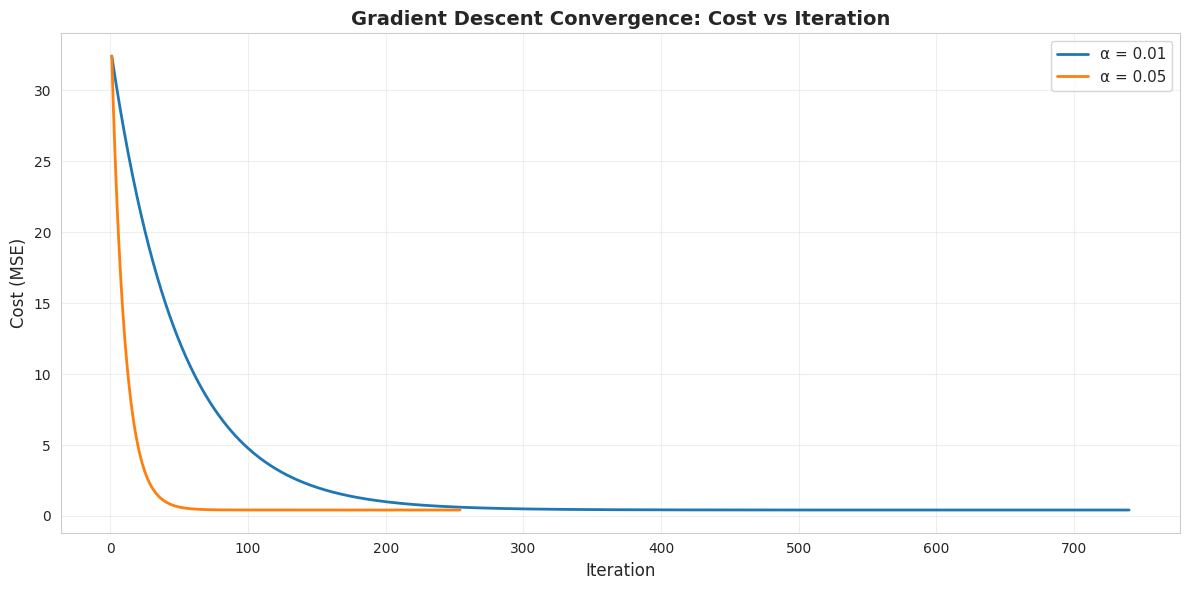


---------FINAL RESULTS SUMMARY-----------


Best learning rate based on validation MSE: α = 0.05

                    Method        Set      MSE     RMSE       R²
          Normal Equation      Train 0.416676 0.645504 0.373392
          Normal Equation Validation 0.426802 0.653301 0.358334
          Normal Equation       Test 0.517282 0.719223 0.305115
Gradient Descent (α=0.05)      Train 0.416813 0.645611 0.373185
Gradient Descent (α=0.05) Validation 0.425842 0.652566 0.359777
Gradient Descent (α=0.05)       Test 0.518853 0.720314 0.303005


In [ ]:
#set random feed
np.random.seed(409)
#seperate the files as X and Y
X = dataFile.drop('quality', axis=1).values #all 11 features
Y = dataFile['quality'].values #target variable

#Data partitioning and preprocessing
samples = len(X)
indices = np.random.permutation(samples)  #to order them differently
train_data_size = int(0.70 * samples)
val_data_size = int(0.15 * samples)
test_data_size = samples - train_data_size - val_data_size

train_data_index = indices[:train_data_size]
val_data_index = indices[train_data_size:train_data_size+val_data_size]
test_data_index = indices[train_data_size + val_data_size:]

X_train, y_train = X[train_data_index], Y[train_data_index]
X_val, y_val = X[val_data_index], Y[val_data_index]
X_test, y_test = X[test_data_index], Y[test_data_index]

#z score calculation with only train data set
trainData_mean = np.mean(X_train, axis=0)
trainData_std = np.std(X_train, axis=0)

#Standardise features (z-score) using statistics computed on the training set only
X_train_standardised = (X_train - trainData_mean) / trainData_std
X_val_standardised = (X_val - trainData_mean) / trainData_std
X_test_standardised = (X_test - trainData_mean) / trainData_std

#Add an explicit bias term to the design matrix (prepend a column of ones)
trainDataX_bias = np.c_[np.ones(X_train_standardised.shape[0]), X_train_standardised]
valDataX_bias = np.c_[np.ones(X_val_standardised.shape[0]),X_val_standardised]
testDataX_bias = np.c_[np.ones(X_test_standardised.shape[0]), X_test_standardised]

#helper functions
def compute_mse(real_y, estimated_y):
  #calculate mean squared error
  return np.mean((real_y - estimated_y) ** 2)

def compute_rmse(real_y, estimated_y):
  #calculate root mean squared error
  return np.sqrt(compute_mse(real_y, estimated_y))

def compute_r2(real_y, estimated_y):
    #Calculate R-squared
    ss_res = np.sum((real_y - estimated_y) ** 2)
    ss_tot = np.sum((real_y - np.mean(real_y)) ** 2)
    return 1 - (ss_res / ss_tot)

def predict(X, beta):  #?????????????
    """Make predictions"""
    return X @ beta

#------------------------------------------------------------------------------
#Normal Equation Solution.
print("\n----------------NORMAL EQUATION SOLUTION-----------------\n")

#computing the beta (β)
X_T_X_pinv = np.linalg.pinv(trainDataX_bias.T @ trainDataX_bias)
beta_normal = X_T_X_pinv @ trainDataX_bias.T @ y_train

#predictions
trainData_estimatedY = predict(trainDataX_bias, beta_normal)
valData_estimatedY = predict(valDataX_bias, beta_normal)
testData_estimatedY = predict(testDataX_bias, beta_normal)

#evaluation of MSE, RMSE, and R^2 for normal equation
train_mse_normal = compute_mse(y_train, trainData_estimatedY)
train_rmse_normal = compute_rmse(y_train, trainData_estimatedY)
train_r2_normal = compute_r2(y_train, trainData_estimatedY)
val_mse_normal = compute_mse(y_val, valData_estimatedY)
val_rmse_normal = compute_rmse(y_val, valData_estimatedY)
val_r2_normal = compute_r2(y_val, valData_estimatedY)
test_mse_normal = compute_mse(y_test, testData_estimatedY)
test_rmse_normal = compute_rmse(y_test, testData_estimatedY)
test_r2_normal = compute_r2(y_test, testData_estimatedY)
#print the results
print(f"\nNormal Equation Results:")
print(f"  Train - MSE: {train_mse_normal:.4f}, RMSE: {train_rmse_normal:.4f}, R²: {train_r2_normal:.4f}")
print(f"  Val   - MSE: {val_mse_normal:.4f}, RMSE: {val_rmse_normal:.4f}, R²: {val_r2_normal:.4f}")
print(f"  Test  - MSE: {test_mse_normal:.4f}, RMSE: {test_rmse_normal:.4f}, R²: {test_r2_normal:.4f}")

#------------------------------------------------------------------
#step3 Gradient Descent Solution
print("\n----------------Gradient Descent Solution-----------------\n")

def gradient_descent(train_X, train_Y, learning_rate=0.01, max_iterations=10000, epsilon=1e-6):
    #Implement batch gradient descent with the update
    n_samples, n_features = train_X.shape #number of samples, number of features
    beta = np.zeros(n_features)  #beta starts with 0's
    cost_history = []

    for iteration in range(max_iterations):
        predicted_Y = predict(train_X, beta)
        #compute cost
        cost = compute_mse(train_Y, predicted_Y)
        cost_history.append(cost)

        # Compute gradient: dJ/dβ = (1/n) * X^T * (Xβ - y)
        gradient = (1/n_samples) * train_X.T @ (predicted_Y - train_Y)

        # Update parameters: β ← β - α 1/n X^⊤(Xβ − y),
        beta = beta - learning_rate * gradient

        # Early stopping
        if iteration >= 2:
            cost_change_1 = abs(cost_history[-1] - cost_history[-2])
            cost_change_2 = abs(cost_history[-2] - cost_history[-3])
            # If the cost hasn’t changed much for two consecutive steps, stop
            if cost_change_1 < epsilon and cost_change_2 < epsilon:
                print(f"  Converged at iteration {iteration+1}")
                break

    return beta, cost_history

#two distinct learning rates (e.g., α ∈ {0.01, 0.05})
learning_rates = [0.01, 0.05]
gradient_descent_results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate α = {lr}:")

    beta_gd, cost_history = gradient_descent(trainDataX_bias, y_train, learning_rate=lr, max_iterations=10000, epsilon=1e-6)
    #predicting outcomes for train, validation, and test sets using learned β
    y_train_pred_gd = predict(trainDataX_bias, beta_gd)
    y_val_pred_gd = predict(valDataX_bias, beta_gd)
    y_test_pred_gd = predict(testDataX_bias, beta_gd)

    # Evaluation
    train_mse_gd = compute_mse(y_train, y_train_pred_gd)
    train_rmse_gd = compute_rmse(y_train, y_train_pred_gd)
    train_r2_gd = compute_r2(y_train, y_train_pred_gd)

    val_mse_gd = compute_mse(y_val, y_val_pred_gd)
    val_rmse_gd = compute_rmse(y_val, y_val_pred_gd)
    val_r2_gd = compute_r2(y_val, y_val_pred_gd)

    test_mse_gd = compute_mse(y_test, y_test_pred_gd)
    test_rmse_gd = compute_rmse(y_test, y_test_pred_gd)
    test_r2_gd = compute_r2(y_test, y_test_pred_gd)

    gradient_descent_results[lr] = {
        'beta': beta_gd,    #learned parameters
        'cost_history': cost_history,
        'train_mse': train_mse_gd,
        'train_rmse': train_rmse_gd,
        'train_r2': train_r2_gd,
        'val_mse': val_mse_gd,
        'val_rmse': val_rmse_gd,
        'val_r2': val_r2_gd,
        'test_mse': test_mse_gd,
        'test_rmse': test_rmse_gd,
        'test_r2': test_r2_gd
    }

    print(f"  Final cost: {cost_history[-1]:.4f} after {len(cost_history)} iterations")
    print(f"  Train - MSE: {train_mse_gd:.4f}, RMSE: {train_rmse_gd:.4f}, R^2: {train_r2_gd:.4f}")
    print(f"  Val   - MSE: {val_mse_gd:.4f}, RMSE: {val_rmse_gd:.4f}, R^2: {val_r2_gd:.4f}")
    print(f"  Test  - MSE: {test_mse_gd:.4f}, RMSE: {test_rmse_gd:.4f}, R^2: {test_r2_gd:.4f}")

#plot the convergence plot
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    cost_history = gradient_descent_results[lr]['cost_history']
    plt.plot(range(1, len(cost_history)+1), cost_history, label=f'α = {lr}', linewidth=2)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.title('Gradient Descent Convergence: Cost vs Iteration', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Step4 : reporting ---------------------------------------------------------------------

print("\n---------FINAL RESULTS SUMMARY-----------\n")

# Determine best learning rate based on validation performance
best_lr = min(learning_rates, key=lambda lr: gradient_descent_results[lr]['val_mse'])
print(f"\nBest learning rate based on validation MSE: α = {best_lr}")

# Create results table
results_data = {
    'Method': ['Normal Equation', 'Normal Equation', 'Normal Equation',
               f'Gradient Descent (α={best_lr})', f'Gradient Descent (α={best_lr})', f'Gradient Descent (α={best_lr})'],
    'Set': ['Train', 'Validation', 'Test', 'Train', 'Validation', 'Test'],
    'MSE': [train_mse_normal, val_mse_normal, test_mse_normal,
            gradient_descent_results[best_lr]['train_mse'], gradient_descent_results[best_lr]['val_mse'], gradient_descent_results[best_lr]['test_mse']],
    'RMSE': [train_rmse_normal, val_rmse_normal, test_rmse_normal,
             gradient_descent_results[best_lr]['train_rmse'], gradient_descent_results[best_lr]['val_rmse'], gradient_descent_results[best_lr]['test_rmse']],
    'R²': [train_r2_normal, val_r2_normal, test_r2_normal,
           gradient_descent_results[best_lr]['train_r2'], gradient_descent_results[best_lr]['val_r2'], gradient_descent_results[best_lr]['test_r2']]
}

results_df = pd.DataFrame(results_data)
print("\n", results_df.to_string(index=False))


**Task 2.1 Linear Regression Implementation**


The convergence plot demonstrates that both learning rates have succesfully minimized the cost function. When α = 0.05 convergence graph decreases faster than α = 0.01 due to larger parameter updates. Model doesn't show overfitting as traning, validation and test R-square values are approximate to each other.

**Task 2: Regression and Classification**
2.2 Logistic Regression Implementation

---




--------Logistic Regression - Binary Classification----------


Binary Target Distribution:
  Training set:
    Low quality (0): 443 (46.6%)
    High quality (1): 508 (53.4%)
  Validation set:
    Low quality (0): 95 (46.8%)
    High quality (1): 108 (53.2%)
  Test set:
    Low quality (0): 102 (49.8%)
    High quality (1): 103 (50.2%)

Using standardized features with bias term:
  Training: (951, 12)
  Validation: (203, 12)
  Test: (205, 12)

---------Gradient DEscent Optimzation-----------


Training with learning rate α = 0.001
    Iteration 5000/50000 - Cost: 0.522494
    Iteration 10000/50000 - Cost: 0.508825
    Converged at iteration 10492
    Final cost change: 0.0000009996
  Number of iterations: 10492
  Initial cost: 0.693147
  Final cost: 0.508301

Training with learning rate α = 0.01
    Converged at iteration 2263
    Final cost change: 0.0000009981
  Number of iterations: 2263
  Initial cost: 0.693147
  Final cost: 0.504043

-----------CONVERGENCE PLOT-----------



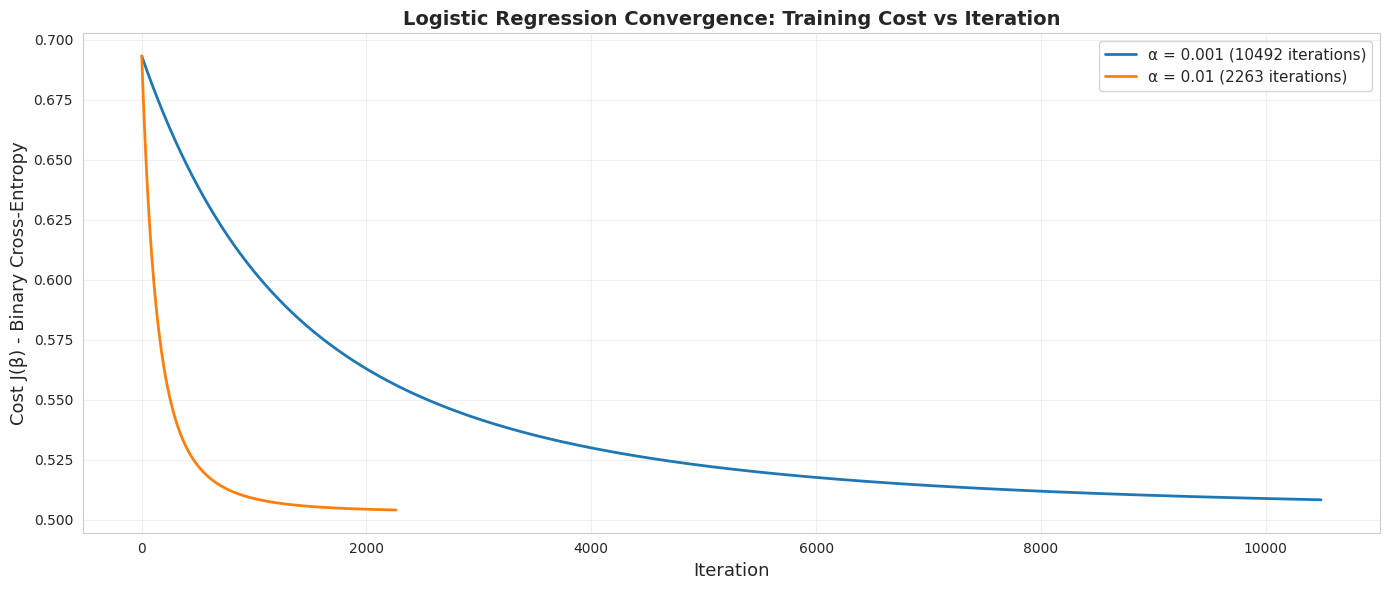


-----------EVALUATION-----------


Best Learning Rate (lowest final cost): α : 0.01

-----------CONFUSION MATRIX RESULTS -----------



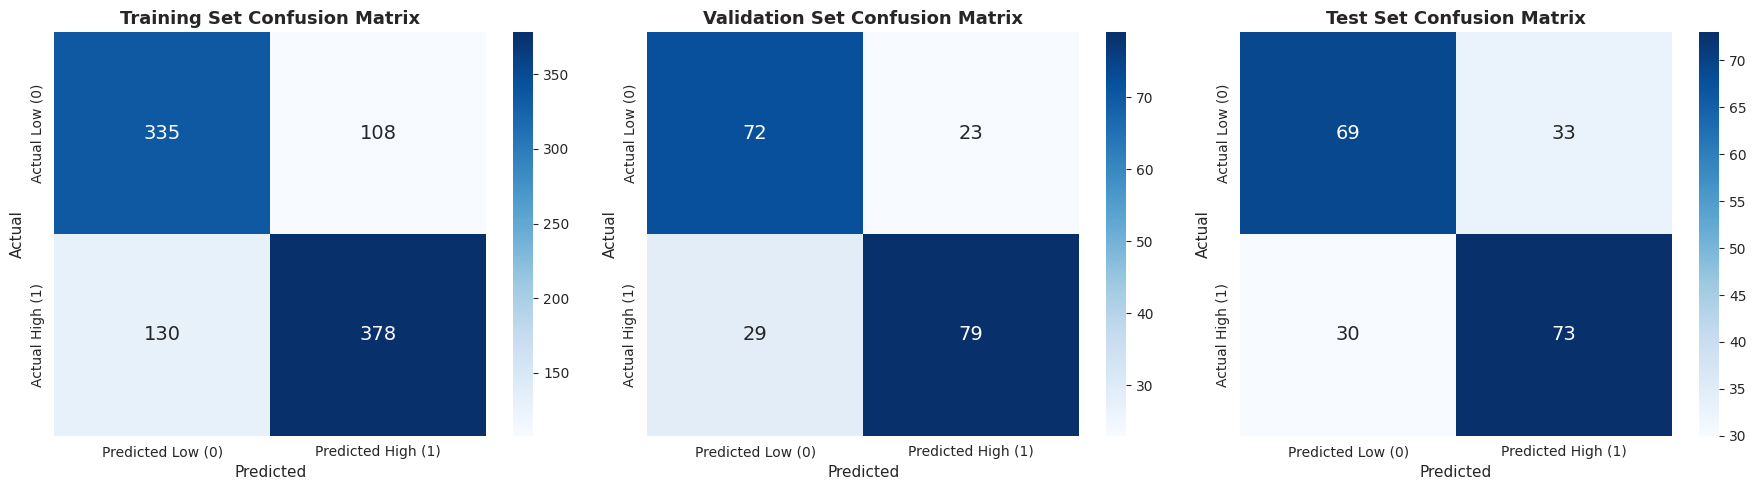


PERFORMANCE METRICS

        Set  Accuracy  Precision   Recall  F1-Score
  Training  0.749737   0.777778 0.744094  0.760563
Validation  0.743842   0.774510 0.731481  0.752381
      Test  0.692683   0.688679 0.708738  0.698565


In [ ]:
#Binary target construction and preprocessing
print("\n--------Logistic Regression - Binary Classification----------\n")
#converting to binary labels
train_y_bin = (y_train >= 6).astype(int)
val_y_bin = (y_val >= 6).astype(int)
test_y_bin = (y_test >= 6).astype(int)

print(f"\nBinary Target Distribution:")
print(f"  Training set:")
print(f"    Low quality (0): {np.sum(train_y_bin == 0)} ({np.sum(train_y_bin == 0)/len(train_y_bin)*100:.1f}%)")
print(f"    High quality (1): {np.sum(train_y_bin == 1)} ({np.sum(train_y_bin == 1)/len(train_y_bin)*100:.1f}%)")
print(f"  Validation set:")
print(f"    Low quality (0): {np.sum(val_y_bin == 0)} ({np.sum(val_y_bin == 0)/len(val_y_bin)*100:.1f}%)")
print(f"    High quality (1): {np.sum(val_y_bin == 1)} ({np.sum(val_y_bin == 1)/len(val_y_bin)*100:.1f}%)")
print(f"  Test set:")
print(f"    Low quality (0): {np.sum(test_y_bin == 0)} ({np.sum(test_y_bin == 0)/len(test_y_bin)*100:.1f}%)")
print(f"    High quality (1): {np.sum(test_y_bin == 1)} ({np.sum(test_y_bin == 1)/len(test_y_bin)*100:.1f}%)")
#Use the same standardised feature matrix X as in Task 2.1, with the bias term included.
print(f"\nUsing standardized features with bias term:")
print(f"  Training: {trainDataX_bias.shape}")
print(f"  Validation: {valDataX_bias.shape}")
print(f"  Test: {testDataX_bias.shape}")
#functions
def sigmoid_function(z):
  #σ(z) = 1 / (1 + e^(-z)) sigmoid function
  # Clip z to prevent overflow
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def log_regression_prediction(X, beta):
  z = X @ beta
  return sigmoid_function(z)

def binary_prediction(X, beta, threshold=0.5):
  probs = log_regression_prediction(X, beta)
  return (probs >= threshold).astype(int)

def bin_cross_entropy_loss(true_y, pred_y):
  #J(β) = -(1/n) * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
  pred_y = np.clip(pred_y, 1e-15, 1 - 1e-15) #caps probabilities away from 0 or 1 so log(0) doesn’t produce -inf
  n=len(true_y)
  loss = -(1/n) * np.sum(true_y * np.log(pred_y) + (1 - true_y) * np.log(1 - pred_y))
  return loss

#Gradient Descent optimisation.
def logistic_gradient_descent(train_X, train_Y, learning_rate=0.01, max_iterations=50000, epsilon=1e-6):
  n_samples, n_features = train_X.shape
  beta = np.zeros(n_features)
  costHistory = []
  for iteration in range(max_iterations):
    pred_y = log_regression_prediction(train_X, beta)
    cost = bin_cross_entropy_loss(train_Y, pred_y)
    costHistory.append(cost)
    # Compute gradient: (1/n) * X^T * (ŷ - y)
    gradient = (1 / n_samples) * train_X.T @ (pred_y- train_Y)
    # Update parameters: β ← β - α * gradient
    beta = beta - learning_rate * gradient
    #Stop early if the absolute change in cost |J(t) − J(t − 1)| falls below ε = 10−6 for two consecutive iterations.
    if iteration >= 2:
        cost_change_1 = abs(costHistory[-1] - costHistory[-2])
        cost_change_2 = abs(costHistory[-2] - costHistory[-3])

        if cost_change_1 < epsilon and cost_change_2 < epsilon:
            print(f"    Converged at iteration {iteration + 1}")
            print(f"    Final cost change: {cost_change_1:.10f}")
            break

      # Print progress every 5000 iterations
    if (iteration + 1) % 5000 == 0:
        print(f"    Iteration {iteration + 1}/{max_iterations} - Cost: {cost:.6f}")

  else:
      print(f"    Reached maximum iterations ({max_iterations})")

  return beta, costHistory

print("\n---------Gradient DEscent Optimzation-----------\n")
# Train with multiple learning rates
learning_rates = [0.001, 0.01]
logistic_results = {}
for lr in learning_rates:
    print(f"\n{'='*70}")
    print(f"Training with learning rate α = {lr}")
    print(f"{'='*70}")

    # Train model
    beta_logistic, costHistory = logistic_gradient_descent(
        trainDataX_bias,
        train_y_bin,
        learning_rate=lr,
        max_iterations=50000,
        epsilon=1e-6
    )

    print(f"  Number of iterations: {len(costHistory)}")
    print(f"  Initial cost: {costHistory[0]:.6f}")
    print(f"  Final cost: {costHistory[-1]:.6f}")

    # Store results
    logistic_results[lr] = {
        'beta': beta_logistic,
        'cost_history': costHistory,
        'iterations': len(costHistory)
    }


#Plot the training cost versus iteration number for both learning rates on the same graph.
print("\n-----------CONVERGENCE PLOT-----------\n")
plt.figure(figsize=(14, 6))
for lr in learning_rates:
    cost_history = logistic_results[lr]['cost_history']
    iterations = len(cost_history)

    plt.plot(range(1, iterations + 1), cost_history,
             label=f'α = {lr} ({iterations} iterations)',
             linewidth=2)

plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Cost J(β) - Binary Cross-Entropy', fontsize=13)
plt.title('Logistic Regression Convergence: Training Cost vs Iteration',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#evaluation part
print("\n-----------EVALUATION-----------\n")
#compute predictions on the validation and test sets using a threshold of 0.5.
def compute_confusion_matrix(true_y, pred_y):
    TP = np.sum((true_y == 1) & (pred_y == 1))
    TN = np.sum((true_y == 0) & (pred_y == 0))
    FP = np.sum((true_y == 0) & (pred_y == 1))
    FN = np.sum((true_y == 1) & (pred_y == 0))
    return np.array([[TN, FP], [FN, TP]])
def calculate_metrics(true_y, pred_y):
    confusion_matrix = compute_confusion_matrix(true_y, pred_y)
    TN, FP = confusion_matrix[0]
    FN, TP = confusion_matrix[1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'confusion_matrix': confusion_matrix,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN
    }
best_model = min(learning_rates, key=lambda lr: logistic_results[lr]['cost_history'][-1])
print(f"\nBest Learning Rate (lowest final cost): α : {best_model}")

beta_best = logistic_results[best_model]['beta']

# Make predictions (threshold = 0.5)
train_pred = binary_prediction(trainDataX_bias, beta_best, threshold=0.5)
val_pred = binary_prediction(valDataX_bias, beta_best, threshold=0.5)
test_pred = binary_prediction(testDataX_bias, beta_best, threshold=0.5)

# Compute metrics
train_metrics = calculate_metrics(train_y_bin, train_pred)
val_metrics = calculate_metrics(val_y_bin, val_pred)
test_metrics = calculate_metrics(test_y_bin, test_pred)

# Present the confusion matrix (numeric or heatmap form) and the metric values in a clear table.
print("\n-----------CONFUSION MATRIX RESULTS -----------\n")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets = [
    ('Training', train_metrics['confusion_matrix']),
    ('Validation', val_metrics['confusion_matrix']),
    ('Test', test_metrics['confusion_matrix'])
]

for idx, (name, cm) in enumerate(datasets):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Low (0)', 'Predicted High (1)'],
                yticklabels=['Actual Low (0)', 'Actual High (1)'],
                ax=axes[idx], cbar=True, annot_kws={"size": 14})
    axes[idx].set_title(f'{name} Set Confusion Matrix', fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11)
    axes[idx].set_xlabel('Predicted', fontsize=11)

plt.tight_layout()
plt.show()

#metric values in a clear table
print("\n" + "="*70)
print("PERFORMANCE METRICS")
print("="*70)

results_data = {
    'Set': ['Training', 'Validation', 'Test'],
    'Accuracy': [train_metrics['accuracy'], val_metrics['accuracy'], test_metrics['accuracy']],
    'Precision': [train_metrics['precision'], val_metrics['precision'], test_metrics['precision']],
    'Recall': [train_metrics['recall'], val_metrics['recall'], test_metrics['recall']],
    'F1-Score': [train_metrics['f1'], val_metrics['f1'], test_metrics['f1']]
}

results_df = pd.DataFrame(results_data)
print("\n", results_df.to_string(index=False))

2.2 Logistic Regression Comment:
The logistic regression model with learning rate = 0.01 converged significantly faster compared to learning rate = 0.001 while also achieving lower final training cost (0.504043 vs 0.508301). The model correctly classifies about 69% of wines in the test set, with similar precision (69%) and recall (71%), showing it can reasonably distinguish between high and low-quality wines. The model makes 33 false positive errors (predicting low-quality wines as high-quality) and 30 false negative errors (predicting high-quality wines as low-quality). False negatives are more serious in this situation because marking good wines as bad means they will be sold for less money than they should be, while false positives can be fixed by checking the wine quality again.


**Task 3: Decision Tree**

In [ ]:
#decision tree
#data preperation
#Use the same training, validation, and test splits defined in Task 2
X_train_tree = X_train
X_val_tree = X_val
X_test_tree = X_test
#Treat the problem as a binary classification task using the same labels defined in Logistic Regression
y_train_tree = train_y_bin
y_val_tree = val_y_bin
y_test_tree = test_y_bin

#delete later
print(f"Training set: {X_train_tree.shape[0]} samples")
print(f"Validation set: {X_val_tree.shape[0]} samples")
print(f"Test set: {X_test_tree.shape[0]} samples")
print(f"\nClass distribution in training set:")
print(f"  Class 0 (low quality): {np.sum(y_train_tree == 0)} ({np.sum(y_train_tree == 0)/len(y_train_tree)*100:.1f}%)")
print(f"  Class 1 (high quality): {np.sum(y_train_tree == 1)} ({np.sum(y_train_tree == 1)/len(y_train_tree)*100:.1f}%)")

#2 Gini impurity calculation.
#gini calculation function
def calculate_gini(y):
  # G(S) = 1 - Σ(p_c^2)
  if len(y) == 0:
        return 0

  # Calculate proportion of each class
  classes, counts = np.unique(y, return_counts=True)
  proportions = counts / len(y)

  # Gini = 1 - sum of squared proportions
  gini = 1 - np.sum(proportions ** 2)

  return gini
#reduction
def gini_reduction(parent, left, right):
  #ΔG = G(S) - |S_L|/|S| * G(S_L) - |S_R|/|S| * G(S_R)
  n_parent = len(parent)
  n_left = len(left)
  n_right = len(right)
  if n_parent == 0:
    return 0
  gini_parent = calculate_gini(parent)
  gini_left = calculate_gini(left)
  gini_right = calculate_gini(right)
  #İmpurity reduction
  reduction = gini_parent - (n_left / n_parent) * gini_left - (n_right / n_parent) * gini_right
  return reduction

#select the best split using impurity reduction ∆G and recursively build left and right subtrees.
def find_best_split(X, y):
    n_samples, n_features = X.shape
    print(n_samples)
    print(n_features)
    if n_samples <= 1:
        return None, None, -1

    best_gain = -1
    best_feature = None
    best_threshold = None

    # Try each feature
    for feature_idx in range(n_features):
        feature_values = X[:, feature_idx]

        #get unique values
        unique_values = np.unique(feature_values)

        if len(unique_values) <= 1:
            continue

        #midpoint
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2

        for threshold in thresholds:
            left_mask = feature_values <= threshold
            right_mask = ~left_mask

            y_left = y[left_mask]
            y_right = y[right_mask]

            #skip if empty child
            if len(y_left) == 0 or len(y_right) == 0:
                continue

            # Calculate impurity reduction
            gain = gini_reduction(y, y_left, y_right)

            # Update best split if this is better
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_idx
                best_threshold = threshold

    return best_feature, best_threshold, best_gain

class DecisionTreeNode:
  #node of a decision tree
  def __init__(self, giniValue, num_samples, num_samples_per_class, predicted_class):
      self.giniValue = giniValue
      self.num_samples = num_samples
      self.num_samples_per_class = num_samples_per_class
      self.predicted_class = predicted_class
      self.feature_index = None
      self.threshold = None
      self.left = None
      self.right = None


#recursive tree construction
class DecisionTreeClassifier:
  def __init__(self, max_depth=20, min_samples_leaf=5, min_impurity_decrease=1e-7):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_impurity_decrease = min_impurity_decrease
        self.root = None
        self.n_nodes = 0
        self.n_leaves = 0
  def fit(self, X, y):
        self.n_nodes = 0
        self.n_leaves = 0
        self.root = self.tree_building(X, y, depth=0)
        return self

  def tree_building(self, X, y, depth):
    #recursively build the decision tree
    n_samples = len(y)
    n_classes = len(np.unique(y))

    #class distr. calculation
    numOfSamples_perClass = [np.sum(y == c) for c in [0,1]]
    predicted_class = np.argmax(numOfSamples_perClass)
    gini = calculate_gini(y)

    #node creation
    node = DecisionTreeNode(
            giniValue=gini,
            num_samples=n_samples,
            num_samples_per_class=numOfSamples_perClass,
            predicted_class=predicted_class
    )

    self.n_nodes += 1
    #if all samples in a node belong to the same class, or if a stopping condition is met.
    #all samples belong to the same class
    if n_classes == 1:
          self.n_leaves += 1
          return node

    #max depth
    if depth >= self.max_depth:
          self.n_leaves += 1
          return node

    #select the best split using impurity reduction
    feature_idx, threshold, gain = find_best_split(X, y)

    #no valid split found or impurity decrease too small
    if feature_idx is None or gain < self.min_impurity_decrease:
          self.n_leaves += 1
          return node
    # Split the data
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask

    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    #check minimum samples per leaf
    if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
        self.n_leaves += 1
        return node

    # Store split information
    node.feature_index = feature_idx
    node.threshold = threshold

    # Recursively build left and right subtrees
    node.left = self.tree_building(X_left, y_left, depth + 1)
    node.right = self.tree_building(X_right, y_right, depth + 1)

    return node

  def prediction(self, X):
    #predict class for X
    return np.array([self.sample_prediction(x, self.root) for x in X])

  def sample_prediction(self, x, node):
    #if leaf node return predicted class
    if node.left is None and node.right is None:
      return node.predicted_class

    #traverse left and right side based on fetaure threshold
    if x[node.feature_index] <= node.threshold:
      return self.sample_prediction(x, node.left)
    else:
      return self.sample_prediction(x, node.right)

  def get_depth(self, node=None):
    if node is None:
      node = self.root
    if node.left is None and node.right is None:
            return 0

    left_depth = self.get_depth(node.left) if node.left else 0
    right_depth = self.get_depth(node.right) if node.right else 0

    return 1 + max(left_depth, right_depth)


#training the decision tree
print("\n-----------training the decision tree---------------\n")
decisionTree_classifier = DecisionTreeClassifier(
    max_depth=20,
    min_samples_leaf=5,
    min_impurity_decrease=1e-7
)
print("\nTraining decision tree with:")
print(f"  Max depth: {decisionTree_classifier.max_depth}")
print(f"  Min samples per leaf: {decisionTree_classifier.min_samples_leaf}")
print(f"  Min impurity decrease: {decisionTree_classifier.min_impurity_decrease}")

decisionTree_classifier.fit(X_train_tree, y_train_tree)

print(f"\nTree construction complete:")
print(f"  Total nodes: {decisionTree_classifier.n_nodes}")
print(f"  Leaf nodes: {decisionTree_classifier.n_leaves}")
print(f"  Actual tree depth: {decisionTree_classifier.get_depth()}")

#makeing prediction
train_pred_y_tree = decisionTree_classifier.prediction(X_train_tree)
val_pred_y_tree = decisionTree_classifier.prediction(X_val_tree)
test_pred_y_tree = decisionTree_classifier.prediction(X_test_tree)
# Evaluate your model on the validation and test sets using Accuracy, Precision, Recall, and F1-score.
#I used the metric calculations from task 2
train_metrics_tree = calculate_metrics(y_train_tree, train_pred_y_tree)
val_metrics_tree = calculate_metrics(y_val_tree, val_pred_y_tree)
test_metrics_tree = calculate_metrics(y_test_tree, test_pred_y_tree)
#result display
print("\n---------PErformance Metrics-----------")

results_tree = {
    'Set': ['Training', 'Validation', 'Test'],
    'Accuracy': [train_metrics_tree['accuracy'], val_metrics_tree['accuracy'], test_metrics_tree['accuracy']],
    'Precision': [train_metrics_tree['precision'], val_metrics_tree['precision'], test_metrics_tree['precision']],
    'Recall': [train_metrics_tree['recall'], val_metrics_tree['recall'], test_metrics_tree['recall']],
    'F1-Score': [train_metrics_tree['f1'], val_metrics_tree['f1'], test_metrics_tree['f1']]
}

results_tree_df = pd.DataFrame(results_tree)
print("\n", results_tree_df.to_string(index=False))



Training set: 951 samples
Validation set: 203 samples
Test set: 205 samples

Class distribution in training set:
  Class 0 (low quality): 443 (46.6%)
  Class 1 (high quality): 508 (53.4%)

-----------training the decision tree---------------


Training decision tree with:
  Max depth: 20
  Min samples per leaf: 5
  Min impurity decrease: 1e-07
951
11
498
11
284
11
127
11
69
11
63
11
58
11
157
11
134
11
75
11
34
11
23
11
11
11
41
11
33
11
19
11
5
11
14
11
8
11
14
11
59
11
34
11
20
11
6
11
14
11
8
11
25
11
16
11
9
11
9
11
23
11
214
11
27
11
22
11
187
11
5
11
182
11
170
11
50
11
7
11
120
11
12
11
453
11
207
11
126
11
118
11
55
11
30
11
25
11
25
11
63
11
21
11
42
11
17
11
25
11
7
11
18
11
81
11
75
11
49
11
26
11
8
11
18
11
6
11
6
11
246
11
241
11

Tree construction complete:
  Total nodes: 79
  Leaf nodes: 40
  Actual tree depth: 10

---------PErformance Metrics-----------

        Set  Accuracy  Precision   Recall  F1-Score
  Training  0.852787   0.875510 0.844488  0.859719
Validation  0.

**Task 3.1 Decision Tree Without Pruning Comments:**
The unpruned decision tree has a high training performance with 85.3% accuracy, much better than logistic regression (75.0%). However we can observe model is overfitting and generalises poorly because model has very low training error but high validation/test error. Thus the model memorises noise instead of pattern. Model requires pruning to reduce overfitting.

In [ ]:
#Reduced Error Pruning (REP) to address overfitting
print("\n---------REP----------------\n")
class PDTClassifier(DecisionTreeClassifier):
    def __init__(self, max_depth=20, min_samples_leaf=5, min_impurity_decrease=1e-7):
          super().__init__(max_depth, min_samples_leaf, min_impurity_decrease)
          self.pruning_history = []
    def pruning(self, X_val, y_val):
        print(f"Initial validation accuracy: {self.val_accuracy(X_val, y_val):.4f}")
        iteration = 0
        pruned_flag = True
        # Repeat until no more pruning is possible
        while pruned_flag:
            iteration += 1
            pruned_flag = False

            internal_nodes = self.bottomUpNodes(self.root)
            print(f"\nIteration {iteration}: Found {len(internal_nodes)} internal nodes to consider")
            # Try pruning each internal node
            for node in internal_nodes:
                #skip if node has already a leaf
                if node.left is None and node.right is None:
                    continue

                #get current validation accuracy
                current_accuracy = self.val_accuracy(X_val, y_val)

                # Temporarily prune: save children and convert to leaf
                left_child = node.left
                right_child = node.right
                node.left = None
                node.right = None

                # Compute accuracy after pruning
                new_accuracy = self.val_accuracy(X_val, y_val)

                # If accuracy doesn't decrease, keep the pruning
                if new_accuracy >= current_accuracy:
                    pruned_flag = True
                    self.n_leaves = self.n_leaves - self.calculate_leaves(left_child) - self.calculate_leaves(right_child) + 1
                    self.n_nodes = self.calculate_nodes(self.root)
                    print(f"  ✓ Pruned node (feature {node.feature_index}, threshold {node.threshold:.3f})")
                    print(f"    Accuracy: {current_accuracy:.4f} → {new_accuracy:.4f}")
                else:
                    # Restore the node
                    node.left = left_child
                    node.right = right_child

            if pruned_flag:
                print(f"  Nodes after iteration {iteration}: {self.n_nodes}, Leaves: {self.n_leaves}")

        final_accuracy = self.val_accuracy(X_val, y_val)
        print(f"\nPruning complete!")
        print(f"Final validation accuracy: {final_accuracy:.4f}")
        print(f"Final tree depth: {self.get_depth()}")
        print(f"Final nodes: {self.n_nodes}, Final leaves: {self.n_leaves}")

        return self

    def bottomUpNodes(self, node):
      #(b) For each internal node n (in bottom-up order, starting from nodes closest to leaves)
        if node is None or (node.left is None and node.right is None):
            return []

        nodes=[]

        if node.left is not None:
            nodes.extend(self.bottomUpNodes(node.left))

        if node.right is not None:
            nodes.extend(self.bottomUpNodes(node.right))

        nodes.append(node)

        return nodes
    #(ii) Compute validation accuracy with this change.
    def val_accuracy(self, X, y):
        predictions = self.prediction(X)
        return np.mean(predictions==y)

    def calculate_nodes(self, node):
        if node is None:
            return 0
        if node.left is None and node.right is None:
            return 1
        return 1 + self.calculate_nodes(node.left) + self.calculate_nodes(node.right)

    def calculate_leaves(self, node):
        if node is None:
            return 0
        if node.left is None and node.right is None:
            return 1
        return self.calculate_leaves(node.left) + self.calculate_leaves(node.right)


    #Record validation accuracy, tree depth, and the number of nodes before
print("\n" + "="*70)
print("BEFORE PRUNING - UNPRUNED TREE")
print("="*70)
unpruned_stats = {
    'depth': decisionTree_classifier.get_depth(),
    'nodes': decisionTree_classifier.n_nodes,
    'leaves': decisionTree_classifier.n_leaves,
    'train_acc': train_metrics_tree['accuracy'],
    'val_acc': val_metrics_tree['accuracy'],
    'test_acc': test_metrics_tree['accuracy'],
    'train_f1': train_metrics_tree['f1'],
    'val_f1': val_metrics_tree['f1'],
    'test_f1': test_metrics_tree['f1']
}

print(f"\nUnpruned Tree Structure:")
print(f"  Depth: {unpruned_stats['depth']}")
print(f"  Total Nodes: {unpruned_stats['nodes']}")
print(f"  Leaf Nodes: {unpruned_stats['leaves']}")

print(f"\nUnpruned Tree Performance:")
print(f"  Training Accuracy: {unpruned_stats['train_acc']:.4f}")
print(f"  Validation Accuracy: {unpruned_stats['val_acc']:.4f}")
print(f"  Test Accuracy: {unpruned_stats['test_acc']:.4f}")

#after pruning

print("\n---------AFTER PRUNING---------------------\n")
pruned_tree = PDTClassifier(
    max_depth = 20,
    min_samples_leaf = 5,
    min_impurity_decrease = 1e-7
)

pruned_tree.fit(X_train_tree, y_train_tree)
print(f"Before pruning: ")
print(f"Depth: {pruned_tree.get_depth()}")
print(f"Nodes: {pruned_tree.n_nodes}")
print(f"Leaves: {pruned_tree.n_leaves}")

pruned_tree.pruning(X_val_tree, y_val_tree)

trainData_pred_pruned = pruned_tree.prediction(X_train_tree)
valData_pred_pruned = pruned_tree.prediction(X_val_tree)
testData_pred_pruned = pruned_tree.prediction(X_test_tree)

trainMetric_pruned = calculate_metrics(y_train_tree, trainData_pred_pruned)
valMetric_pruned = calculate_metrics(y_val_tree, valData_pred_pruned)
testMetric_pruned = calculate_metrics(y_test_tree, testData_pred_pruned)

pruned_stats = {
    'depth': pruned_tree.get_depth(),
    'nodes': pruned_tree.n_nodes,
    'leaves': pruned_tree.n_leaves,
    'train_acc': trainMetric_pruned['accuracy'],
    'val_acc': valMetric_pruned['accuracy'],
    'test_acc': testMetric_pruned['accuracy'],
    'train_f1': trainMetric_pruned['f1'],
    'val_f1': valMetric_pruned['f1'],
    'test_f1': testMetric_pruned['f1']
}

print(f"\nPruned Tree Structure:")
print(f"  Depth: {pruned_stats['depth']}")
print(f"  Total Nodes: {pruned_stats['nodes']}")
print(f"  Leaf Nodes: {pruned_stats['leaves']}")

print(f"\nPruned Tree Performance:")
print(f"  Training Accuracy: {pruned_stats['train_acc']:.4f}")
print(f"  Validation Accuracy: {pruned_stats['val_acc']:.4f}")
print(f"  Test Accuracy: {pruned_stats['test_acc']:.4f}")


#comparison between pruned an unpruned decision tree
print("\n----------COMPARISON: UNPRUNED vs PRUNED--------------\n")
comparison_data = {
    'Decision Tree': ['Tree Depth', 'Total Nodes', 'Leaf Nodes',
               'Train Accuracy', 'Val Accuracy', 'Test Accuracy',
               'Train F1', 'Val F1', 'Test F1'],
    'Unpruned': [
        unpruned_stats['depth'], unpruned_stats['nodes'], unpruned_stats['leaves'],
        unpruned_stats['train_acc'], unpruned_stats['val_acc'], unpruned_stats['test_acc'],
        unpruned_stats['train_f1'], unpruned_stats['val_f1'], unpruned_stats['test_f1']
    ],
    'Pruned': [
        pruned_stats['depth'], pruned_stats['nodes'], pruned_stats['leaves'],
        pruned_stats['train_acc'], pruned_stats['val_acc'], pruned_stats['test_acc'],
        pruned_stats['train_f1'], pruned_stats['val_f1'], pruned_stats['test_f1']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))






---------REP----------------


BEFORE PRUNING - UNPRUNED TREE

Unpruned Tree Structure:
  Depth: 10
  Total Nodes: 79
  Leaf Nodes: 40

Unpruned Tree Performance:
  Training Accuracy: 0.8528
  Validation Accuracy: 0.7143
  Test Accuracy: 0.6829

---------AFTER PRUNING---------------------

951
11
498
11
284
11
127
11
69
11
63
11
58
11
157
11
134
11
75
11
34
11
23
11
11
11
41
11
33
11
19
11
5
11
14
11
8
11
14
11
59
11
34
11
20
11
6
11
14
11
8
11
25
11
16
11
9
11
9
11
23
11
214
11
27
11
22
11
187
11
5
11
182
11
170
11
50
11
7
11
120
11
12
11
453
11
207
11
126
11
118
11
55
11
30
11
25
11
25
11
63
11
21
11
42
11
17
11
25
11
7
11
18
11
81
11
75
11
49
11
26
11
8
11
18
11
6
11
6
11
246
11
241
11
Before pruning: 
Depth: 10
Nodes: 79
Leaves: 40
Initial validation accuracy: 0.7143

Iteration 1: Found 39 internal nodes to consider
  ✓ Pruned node (feature 2, threshold 0.025)
    Accuracy: 0.7143 → 0.7241
  ✓ Pruned node (feature 1, threshold 0.647)
    Accuracy: 0.7241 → 0.7241
  ✓ Pruned node (